In [5]:
!dir

 Volume in drive C is Acer
 Volume Serial Number is D812-1956

 Directory of C:\Code Playground\Smartathon_project

18-01-2023  00:55    <DIR>          .
17-01-2023  23:46    <DIR>          ..
17-01-2023  23:49    <DIR>          .ipynb_checkpoints
17-01-2023  23:47    <DIR>          dataset
18-01-2023  00:55           526,176 Pollutant_classification.ipynb
18-01-2023  00:46                 0 X.pickle
18-01-2023  00:30           159,760 y.pickle
               3 File(s)        685,936 bytes
               4 Dir(s)  273,446,981,632 bytes free


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
IMAGEPATH="dataset/images"
training_data=pd.read_csv("dataset/train.csv")
testing_data=pd.read_csv("dataset/test.csv")

In [7]:
training_data.head()

,class,image_path,name,xmax,xmin,ymax,ymin
0,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797.0,701.0,262.0,211.0
1,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932.0,786.0,329.0,238.0
2,3.0,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736.0,657.0,275.0,229.0
3,7.0,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986.0,786.0,136.0,0.0
4,8.0,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667.0,549.0,228.0,179.0


In [8]:
testing_data.head()

,image_path
0,953ab1447c46ecfef67ab14629cd70c7.jpg
1,e4ddbaa7970fca225a51288ce5f7d3f9.jpg
2,5b8120d69607a077b7583334be3ba18b.jpg
3,138b1dc82005b4c33e4886260649d313.jpg
4,0f91ec1533b845b13089f8cf4e0a36f7.jpg


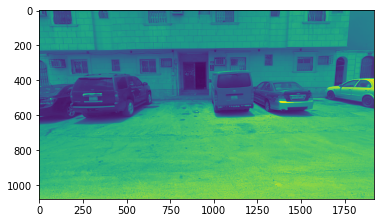

In [9]:
import cv2 as cv
import os
#Reading image in Gray Scale
for img in os.listdir(IMAGEPATH): 
    img_array=cv.imread(os.path.join(IMAGEPATH,img),cv.IMREAD_GRAYSCALE)
    plt.imshow(img_array)
    plt.show()
    break

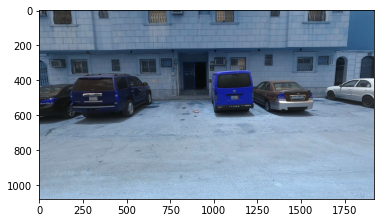

In [10]:
#Reading image in BGR
for img in os.listdir(IMAGEPATH): 
    img_array=cv.imread(os.path.join(IMAGEPATH,img))
    plt.imshow(img_array)
    plt.show()
    break

(1080, 1920, 3)


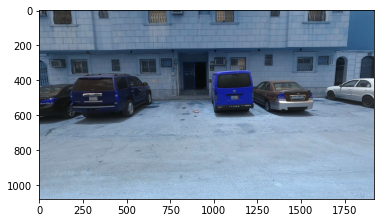

In [11]:
#Reading image in RGB
for img in os.listdir(IMAGEPATH): 
    img_array=cv.imread(os.path.join(IMAGEPATH,img))
    print(img_array.shape)
    plt.imshow(img_array)
    plt.show()
    break

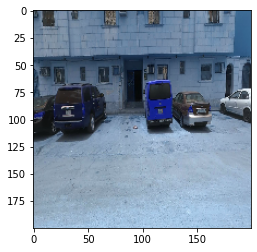

In [12]:
#since image size is too high as per need we will resize it down
IMGSIZE=200
for img in os.listdir(IMAGEPATH): 
    img_array=cv.imread(os.path.join(IMAGEPATH,img))
    new_array=cv.resize(img_array,(IMGSIZE,IMGSIZE))
    plt.imshow(new_array)
    plt.show()
    break
    
#200 image size is good

In [13]:
#Sets Extract name of all the labels and their respective classes
from collections import Counter
Pollutants=np.array(list(Counter(training_data.iloc[:,2].values).keys()))
Pollutants

array(['GARBAGE', 'BAD_BILLBOARD', 'SAND_ON_ROAD', 'GRAFFITI', 'POTHOLES',
       'CLUTTER_SIDEWALK', 'CONSTRUCTION_ROAD', 'BROKEN_SIGNAGE',
       'UNKEPT_FACADE', 'FADED_SIGNAGE', 'BAD_STREETLIGHT'], dtype='<U17')

In [14]:
GARBAGECLASS=np.array(list(Counter(training_data.iloc[:,0].values).keys()))
GARBAGECLASS

array([ 3.,  7.,  8.,  0.,  2.,  9.,  4.,  5., 10.,  1.,  6.])

In [15]:
GAC={}
for i in range(len(Pollutants)):
  GAC[Pollutants[i]]=GARBAGECLASS[i]
print(GAC)
#Here we can see every pollutant has its specific label of class value

{'GARBAGE': 3.0, 'BAD_BILLBOARD': 7.0, 'SAND_ON_ROAD': 8.0, 'GRAFFITI': 0.0, 'POTHOLES': 2.0, 'CLUTTER_SIDEWALK': 9.0, 'CONSTRUCTION_ROAD': 4.0, 'BROKEN_SIGNAGE': 5.0, 'UNKEPT_FACADE': 10.0, 'FADED_SIGNAGE': 1.0, 'BAD_STREETLIGHT': 6.0}


In [16]:
#let Create our independent and dependent varaible or we call them features and label
X=[]
y=[]
IMG=list(training_data.iloc[:,1].values)
CLASS=list(training_data.iloc[:,0].values)
for i in range(len(IMG)):
    img_array=cv.imread(os.path.join(IMAGEPATH,IMG[i]))
    new_array=cv.resize(img_array,(IMGSIZE,IMGSIZE))
    X.append(new_array)
    y.append(CLASS[i])

In [17]:
X=np.array(X).reshape(-1,IMGSIZE,IMGSIZE,3)
y=np.array(y)

In [18]:
print(X.dtype)
type(X)

uint8


numpy.ndarray

In [19]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [20]:
import pickle
import numpy as np
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)
pickle_in.close()

In [21]:
print(type(X),type(y))
print(X.shape,y.shape)
print(X.dtype,y.dtype)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(19950, 200, 200, 3) (19950,)
uint8 float64


In [22]:
X

array([[[[ 99, 130, 161],
         [102, 132, 157],
         [107, 137, 165],
         ...,
         [178, 173, 170],
         [178, 175, 167],
         [178, 175, 167]],

        [[ 99, 130, 161],
         [102, 132, 157],
         [105, 134, 161],
         ...,
         [178, 173, 170],
         [178, 174, 170],
         [178, 174, 170]],

        [[ 99, 130, 161],
         [102, 132, 157],
         [108, 135, 162],
         ...,
         [180, 175, 172],
         [179, 174, 173],
         [179, 174, 173]],

        ...,

        [[128, 159, 184],
         [130, 157, 183],
         [132, 159, 185],
         ...,
         [141, 167, 191],
         [129, 155, 179],
         [134, 160, 184]],

        [[134, 164, 191],
         [135, 163, 191],
         [142, 170, 196],
         ...,
         [144, 169, 193],
         [133, 159, 183],
         [132, 158, 182]],

        [[131, 161, 190],
         [123, 153, 182],
         [133, 163, 189],
         ...,
         [126, 150, 174],
        

In [23]:
y

array([3., 3., 3., ..., 2., 7., 7.])

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation , Flatten , Conv2D, MaxPooling2D


model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:])) 
#In conv2D Syntax - (convo2D(#filter, (sizeofwindow), input_shapeofmodel))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Another layer 2nd layer
model.add(Conv2D(64,(3,3),input_shape=X.shape[1:])) 
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#since Dense in 1d and conv2D is 2dim you have to flatten the data into 1d
#3rd layer
model.add(Flatten( ))
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

model.fit(X,y,batch_size=32,validation_split=0.1,epochs=3)


Epoch 1/3
562/562 [==============================] - 513s 912ms/step - loss: -28344349360128.0000 - accuracy: 0.0057 - val_loss: -146897343873024.0000 - val_accuracy: 0.0025
Epoch 2/3
562/562 [==============================] - 505s 899ms/step - loss: -914687575195648.0000 - accuracy: 0.0057 - val_loss: -2276933156995072.0000 - val_accuracy: 0.0025
Epoch 3/3
562/562 [==============================] - 509s 906ms/step - loss: -5666696635351040.0000 - accuracy: 0.0057 - val_loss: -10182596512186368.0000 - val_accuracy: 0.0025


In [29]:
y_test=[]
IMG=list(testing_data.iloc[:,0].values)
for i in range(len(IMG)):
    img_array=cv.imread(os.path.join(IMAGEPATH,IMG[i]))
    new_array=cv.resize(img_array,(IMGSIZE,IMGSIZE))
    y_test.append(new_array)
y_test=np.array(y_test)
y_test

array([[[[ 52,  78,  98],
         [ 26,  61,  75],
         [ 25,  60,  70],
         ...,
         [213, 196, 187],
         [213, 196, 187],
         [215, 198, 189]],

        [[ 72, 104, 123],
         [134, 153, 170],
         [ 41,  75,  94],
         ...,
         [215, 198, 189],
         [215, 198, 189],
         [215, 198, 189]],

        [[ 31,  57,  77],
         [ 44,  65,  82],
         [ 46,  81, 107],
         ...,
         [215, 198, 189],
         [215, 198, 189],
         [215, 198, 189]],

        ...,

        [[132, 143, 151],
         [123, 134, 142],
         [116, 127, 135],
         ...,
         [116, 127, 141],
         [120, 130, 147],
         [120, 132, 144]],

        [[101, 112, 120],
         [108, 119, 127],
         [103, 114, 122],
         ...,
         [122, 133, 146],
         [116, 127, 140],
         [121, 132, 143]],

        [[107, 118, 126],
         [120, 131, 139],
         [ 97, 108, 116],
         ...,
         [100, 111, 122],
        

In [31]:
model.predict(y_test).sum()

66/66 [==============================] - 13s 195ms/step


2092.0

In [32]:
model.predict(y_test)

66/66 [==============================] - 13s 197ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)